In [5]:
import json

import pandas as pd

In [6]:
def parse_performance_json(exp_name: str):
    with open(f"out/results/{exp_name}.json", "r") as f:
        data = json.load(f)

    dfs = {}
    for model in data.keys():
        print(f"Model: {model} -> {len(data[model])} folds")

        df = pd.DataFrame(data[model])
        df["model"] = model

        df = df[["model", "fold", "accuracy", "precision", "recall", "f1", "roc_auc"]]

        dfs[model] = df
        # dfs[model]["model"] = model
        # dfs[model]["exp_name"] = exp_name

    df = pd.concat(dfs, axis=0)
    return df

In [ ]:
parse_performance_json("SeaAD")

Model: CTCC -> 5 folds
Model: Pseudobulk -> 5 folds
Model: scAGG -> 5 folds
Model: scAGG+GAT -> 5 folds
Model: scAGG+GAT+AP -> 5 folds
Model: scAGG+AP -> 5 folds
Model: scRAT -> 5 folds


model  fold  accuracy  precision    recall        f1  \
CTCC         0          CTCC     0  0.857143   0.857143  0.947368  0.900000   
             1          CTCC     1  0.928571   0.947368  0.947368  0.947368   
             2          CTCC     2  0.892857   0.863636  1.000000  0.926829   
             3          CTCC     3  0.928571   0.900000  1.000000  0.947368   
             4          CTCC     4  0.892857   0.894737  0.944444  0.918919   
Pseudobulk   0    Pseudobulk     0  0.892857   0.900000  0.947368  0.923077   
             1    Pseudobulk     1  0.964286   0.950000  1.000000  0.974359   
             2    Pseudobulk     2  0.928571   0.904762  1.000000  0.950000   
             3    Pseudobulk     3  0.892857   0.857143  1.000000  0.923077   
             4    Pseudobulk     4  0.892857   0.857143  1.000000  0.923077   
scAGG        0         scAGG     0  0.928571   0.904762  1.000000  0.950000   
             1         scAGG     1  0.964286   0.950000  1.000000  0.974359   
             2         scAGG     2  0.857143   0.826087  1.000000  0.904762   
             3         scAGG     3  0.857143   0.850000  0.944444  0.894737   
             4         scAGG     4  0.892857   0.857143  1.000000  0.923077   
scAGG+GAT    0     scAGG+GAT     0  0.964286   1.000000  0.947368  0.972973   
             1     scAGG+GAT     1  1.000000   1.000000  1.000000  1.000000   
             2     scAGG+GAT     2  1.000000   1.000000  1.000000  1.000000   
             3     scAGG+GAT     3  0.964286   1.000000  0.944444  0.971429   
             4     scAGG+GAT     4  0.964286   0.947368  1.000000  0.972973   
scAGG+GAT+AP 0  scAGG+GAT+AP     0  0.964286   1.000000  0.947368  0.972973   
             1  scAGG+GAT+AP     1  0.964286   1.000000  0.947368  0.972973   
             2  scAGG+GAT+AP     2  1.000000   1.000000  1.000000  1.000000   
             3  scAGG+GAT+AP     3  0.964286   1.000000  0.944444  0.971429   
             4  scAGG+GAT+AP     4  0.964286   0.947368  1.000000  0.972973   
scAGG+AP     0      scAGG+AP     0  0.928571   0.904762  1.000000  0.950000   
             1      scAGG+AP     1  0.964286   0.950000  1.000000  0.974359   
             2      scAGG+AP     2  0.857143   0.826087  1.000000  0.904762   
             3      scAGG+AP     3  0.892857   0.894737  0.944444  0.918919   
             4      scAGG+AP     4  0.892857   0.857143  1.000000  0.923077   
scRAT        0         scRAT     0  0.964286   0.909091  1.000000  0.952381   
             1         scRAT     1  0.857143   0.818182  0.818182  0.818182   
             2         scRAT     2  0.925926   0.888889  0.888889  0.888889   
             3         scRAT     3  0.888889   1.000000  0.666667  0.800000   
             4         scRAT     4  0.925926   0.857143  0.857143  0.857143   

                 roc_auc  
CTCC         0  0.912281  
             1  0.982456  
             2  0.976608  
             3  0.972222  
             4  0.944444  
Pseudobulk   0  0.982456  
             1  0.970760  
             2  0.970760  
             3  0.955556  
             4  1.000000  
scAGG        0  0.994152  
             1  1.000000  
             2  0.976608  
             3  0.977778  
             4  0.983333  
scAGG+GAT    0  0.994152  
             1  1.000000  
             2  1.000000  
             3  0.988889  
             4  0.994444  
scAGG+GAT+AP 0  1.000000  
             1  0.994152  
             2  1.000000  
             3  0.988889  
             4  0.983333  
scAGG+AP     0  1.000000  
             1  0.994152  
             2  0.982456  
             3  0.977778  
             4  0.988889  
scRAT        0  1.000000  
             1  0.941176  
             2  0.925926  
             3  0.901235  
             4  0.992857

Model: CTCC -> 5 folds
Model: Pseudobulk -> 5 folds
Model: scAGG -> 5 folds
Model: scAGG+GAT -> 5 folds
Model: scAGG+GAT+AP -> 5 folds
Model: scAGG+AP -> 5 folds
Model: scRAT -> 5 folds


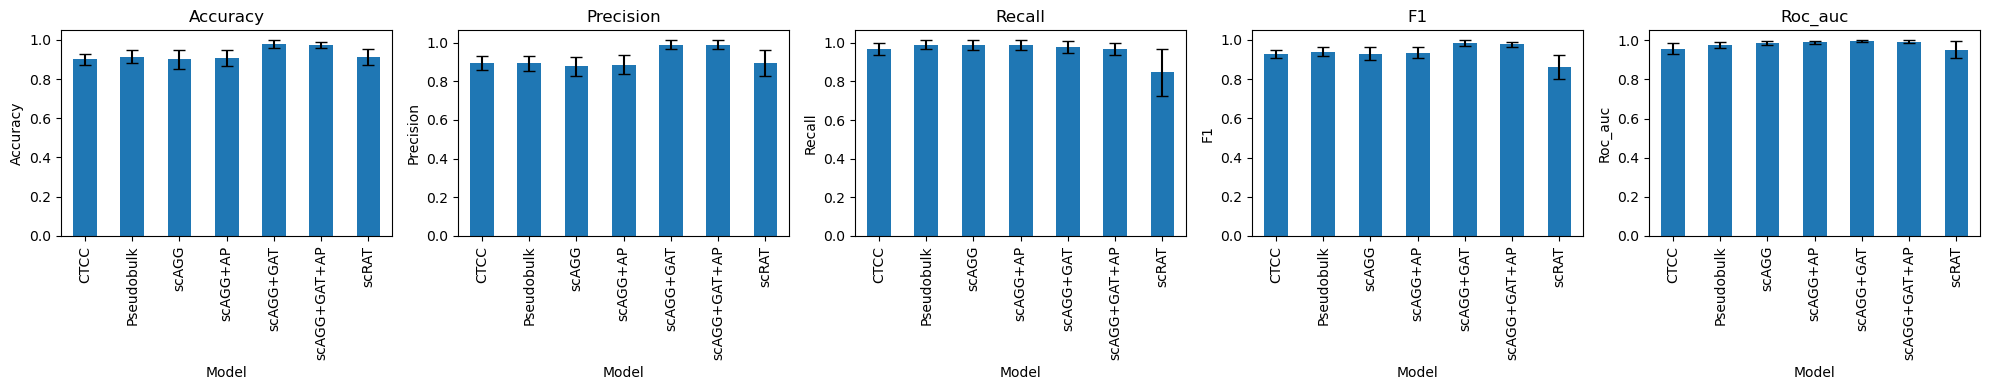

In [8]:
import matplotlib.pyplot as plt

# Parse the performance data
df = parse_performance_json("COMBAT_top2000")

metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=False)

for i, metric in enumerate(metrics):
    avg = df.groupby("model")[metric].mean()
    std = df.groupby("model")[metric].std()
    avg.plot(
        kind="bar",
        yerr=std,
        ax=axes[i],
        title=metric.capitalize(),
        capsize=4,
        legend=False
    )
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_xlabel("Model")

plt.tight_layout()
plt.show()